In [1]:
import pandas as pd
import numpy as np
import missingno as msno

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# On charge nos deux jeux de données
application_test = pd.read_csv('application_test.csv')
application_train = pd.read_csv('application_train.csv')
bureau = pd.read_csv('bureau.csv')
bureau_balance = pd.read_csv('bureau_balance.csv')
credit_card_balance = pd.read_csv('credit_card_balance.csv')
HomeCredit_columns_description = pd.read_csv('HomeCredit_columns_description.csv')
installments_payments = pd.read_csv('installments_payments.csv')
POS_CASH_balance = pd.read_csv('POS_CASH_balance.csv')
previous_application = pd.read_csv('previous_application.csv')

## HomeCredit_columns_descriptions

In [3]:
HomeCredit_columns_description.shape

(219, 5)

In [4]:
HomeCredit_columns_description.head(3)

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN


In [5]:
HomeCredit_columns_description.isnull().sum()

Unnamed: 0       0
Table            0
Row              0
Description      0
Special        133
dtype: int64

In [6]:
HomeCredit_columns_description['Table'].value_counts()

application_{train|test}.csv    122
previous_application.csv         38
credit_card_balance.csv          23
bureau.csv                       17
installments_payments.csv         8
POS_CASH_balance.csv              8
bureau_balance.csv                3
Name: Table, dtype: int64

In [16]:
test = HomeCredit_columns_description[HomeCredit_columns_description['Table'] == 'credit_card_balance.csv']

In [17]:
test.head(20)

,Unnamed: 0,Table,Row,Description,Special
150,153,credit_card_balance.csv,SK_ID_PREV,ID of previous credit in Home credit related t...,hashed
151,154,credit_card_balance.csv,SK_ID_CURR,ID of loan in our sample,hashed
152,155,credit_card_balance.csv,MONTHS_BALANCE,Month of balance relative to application date ...,time only relative to the application
153,156,credit_card_balance.csv,AMT_BALANCE,Balance during the month of previous credit,NaN
154,157,credit_card_balance.csv,AMT_CREDIT_LIMIT_ACTUAL,Credit card limit during the month of the prev...,NaN
155,158,credit_card_balance.csv,AMT_DRAWINGS_ATM_CURRENT,Amount drawing at ATM during the month of the ...,NaN
156,159,credit_card_balance.csv,AMT_DRAWINGS_CURRENT,Amount drawing during the month of the previou...,NaN
157,160,credit_card_balance.csv,AMT_DRAWINGS_OTHER_CURRENT,Amount of other drawings during the month of t...,NaN
158,161,credit_card_balance.csv,AMT_DRAWINGS_POS_CURRENT,Amount drawing or buying goods during the mont...,NaN
159,162,credit_card_balance.csv,AMT_INST_MIN_REGULARITY,Minimal installment for this month of the prev...,NaN


In [18]:
test.sort_values('Row', ascending=True, inplace=True)

<ipython-input-18-d035253f9cdd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.sort_values('Row', ascending=True, inplace=True)


In [19]:
for i in range(0, 23):

    description = test.iloc[i, 3]
    row = test.iloc[i, 2]
    
    print(row, '-', description)

AMT_BALANCE - Balance during the month of previous credit
AMT_CREDIT_LIMIT_ACTUAL - Credit card limit during the month of the previous credit
AMT_DRAWINGS_ATM_CURRENT - Amount drawing at ATM during the month of the previous credit
AMT_DRAWINGS_CURRENT - Amount drawing during the month of the previous credit
AMT_DRAWINGS_OTHER_CURRENT - Amount of other drawings during the month of the previous credit
AMT_DRAWINGS_POS_CURRENT - Amount drawing or buying goods during the month of the previous credit
AMT_INST_MIN_REGULARITY - Minimal installment for this month of the previous credit
AMT_PAYMENT_CURRENT - How much did the client pay during the month on the previous credit
AMT_PAYMENT_TOTAL_CURRENT - How much did the client pay during the month in total on the previous credit
AMT_RECEIVABLE_PRINCIPAL - Amount receivable for principal on the previous credit
AMT_RECIVABLE - Amount receivable on the previous credit
AMT_TOTAL_RECEIVABLE - Total amount receivable on the previous credit
CNT_DRAWING

In [22]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
previous_application['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: NAME_TYPE_SUITE, dtype: int64

In [38]:
installments_payments['NUM_INSTALMENT_VERSION'].dtypes

dtype('float64')

In [15]:
bureau.shape

(1716428, 17)

In [18]:
print('moyenne :', round(bureau['AMT_CREDIT_MAX_OVERDUE'].mean(), 2))
print('médiane :', round(bureau['AMT_CREDIT_MAX_OVERDUE'].median(), 2))
print('mode :', bureau['AMT_CREDIT_MAX_OVERDUE'].mode())
print('max :', round(bureau['AMT_CREDIT_MAX_OVERDUE'].max(), 2))

moyenne : 3825.42
médiane : 0.0
mode : 0    0.0
dtype: float64
max : 115987185.0


In [14]:
test.iloc[2, 3]

'Status of Credit Bureau loan during the month (active, closed, DPD0-30,� [C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60,� 5 means DPD 120+ or sold or written off ] )'

In [6]:
test_bis = HomeCredit_columns_description[HomeCredit_columns_description['Table'] == 'application_{train|test}.csv']

In [7]:
test_bis.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [16]:
days = test_bis[test_bis['Row'] == 'DAYS_EMPLOYED']
days.iloc[0, 3]

'How many days before the application the person started current employment'

In [17]:
days = test_bis[test_bis['Row'] == 'DAYS_BIRTH']
days.iloc[0, 3]

"Client's age in days at the time of application"

In [11]:
for i in range(0, 10):

    description = test_bis.iloc[i, 3]
    row = test_bis.iloc[i, 2]
    
    print(row, '-', description, '\n')

SK_ID_CURR - ID of loan in our sample 

TARGET - Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases) 

NAME_CONTRACT_TYPE - Identification if loan is cash or revolving 

CODE_GENDER - Gender of the client 

FLAG_OWN_CAR - Flag if the client owns a car 

FLAG_OWN_REALTY - Flag if client owns a house or flat 

CNT_CHILDREN - Number of children the client has 

AMT_INCOME_TOTAL - Income of the client 

AMT_CREDIT - Credit amount of the loan 

AMT_ANNUITY - Loan annuity 



## Application train

In [8]:
application_train.shape

(307511, 122)

In [9]:
application_train.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
application_train.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [11]:
application_train.isnull().mean()

SK_ID_CURR                    0.000000
TARGET                        0.000000
NAME_CONTRACT_TYPE            0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.135016
AMT_REQ_CREDIT_BUREAU_WEEK    0.135016
AMT_REQ_CREDIT_BUREAU_MON     0.135016
AMT_REQ_CREDIT_BUREAU_QRT     0.135016
AMT_REQ_CREDIT_BUREAU_YEAR    0.135016
Length: 122, dtype: float64

In [12]:
application_train['CODE_GENDER'].unique()

array(['M', 'F', 'XNA'], dtype=object)

In [14]:
application_train['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [15]:
application_train.isnull().sum().max()

214865

In [3]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [4]:
bureau_balance.shape

(27299925, 3)

In [5]:
bureau_balance['STATUS'].unique()

array(['C', '0', 'X', '1', '2', '3', '5', '4'], dtype=object)

In [39]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [40]:
bureau['CREDIT_CURRENCY'].unique()

array(['currency 1', 'currency 2', 'currency 4', 'currency 3'],
      dtype=object)

In [51]:
previous_application['DAYS_FIRST_DUE'].max()

365243.0

moyenne : 13826.27
médiane : -831.0
mode : 0    365243.0
dtype: float64


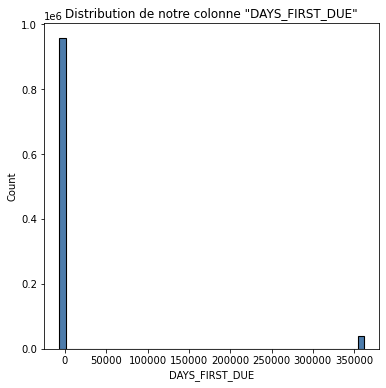

In [52]:
print('moyenne :', round(previous_application['DAYS_FIRST_DUE'].mean(), 2))
print('médiane :', round(previous_application['DAYS_FIRST_DUE'].median(), 2))
print('mode :', previous_application['DAYS_FIRST_DUE'].mode())

# Histrogramme de la distribution de la variable
plt.figure(figsize = (6, 6))
plt.hist(x = previous_application['DAYS_FIRST_DUE'].values, bins = 50, align = 'left', color = '#4d7cab',
         edgecolor = 'black', linewidth = 1.1)
plt.title('Distribution de notre colonne "DAYS_FIRST_DUE"')
plt.xlabel('DAYS_FIRST_DUE')
plt.ylabel('Count')
plt.show()

In [53]:
previous_application['DAYS_FIRST_DUE'].value_counts()

 365243.0    40645
-334.0         772
-509.0         760
-208.0         751
-330.0         750
             ...  
-2889.0         86
-2890.0         73
-2891.0         55
-2.0            14
-2892.0          9
Name: DAYS_FIRST_DUE, Length: 2892, dtype: int64

In [55]:
previous_application.shape

(1670214, 37)

In [63]:
installments_payments

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500,NaN
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500,NaN
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.435,NaN
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500,NaN


In [65]:
installments_payments['NUM_INSTALMENT_VERSION'].nunique()

65